# Dogecoin Price Prediction



### Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./DataSets/DOGE-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


Here we see the data ranges from 2014 to 2021.

Let Check the null values in the dataset

In [3]:
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [4]:
#list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
 
#print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Open 0.0016  % missing values
High 0.0016  % missing values
Low 0.0016  % missing values
Close 0.0016  % missing values
Adj Close 0.0016  % missing values
Volume 0.0016  % missing values


### Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps.

**A. Date v/s Volumn Graph**

Text(0.5, 1.0, 'Date vs Volume')

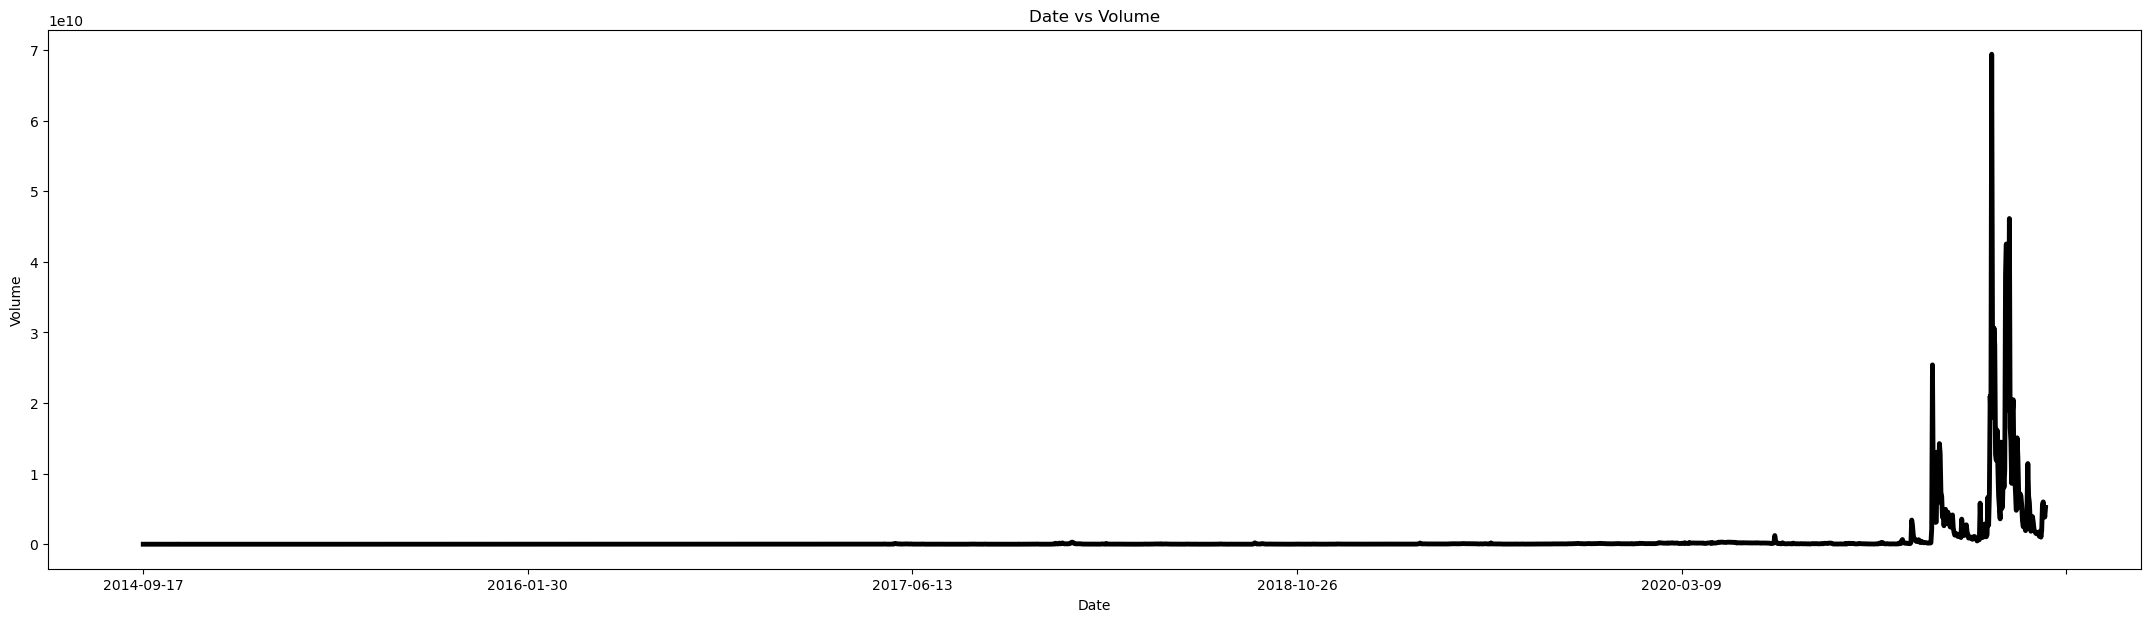

In [5]:
plt.figure(figsize=(27,7))
df.groupby('Date')['Volume'].median().plot(linewidth = 3.5, color = 'k')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume")

**B. Performance of Dogecoin in the year 2021**

Text(0.5, 1.0, 'Date vs Volume of 2021')

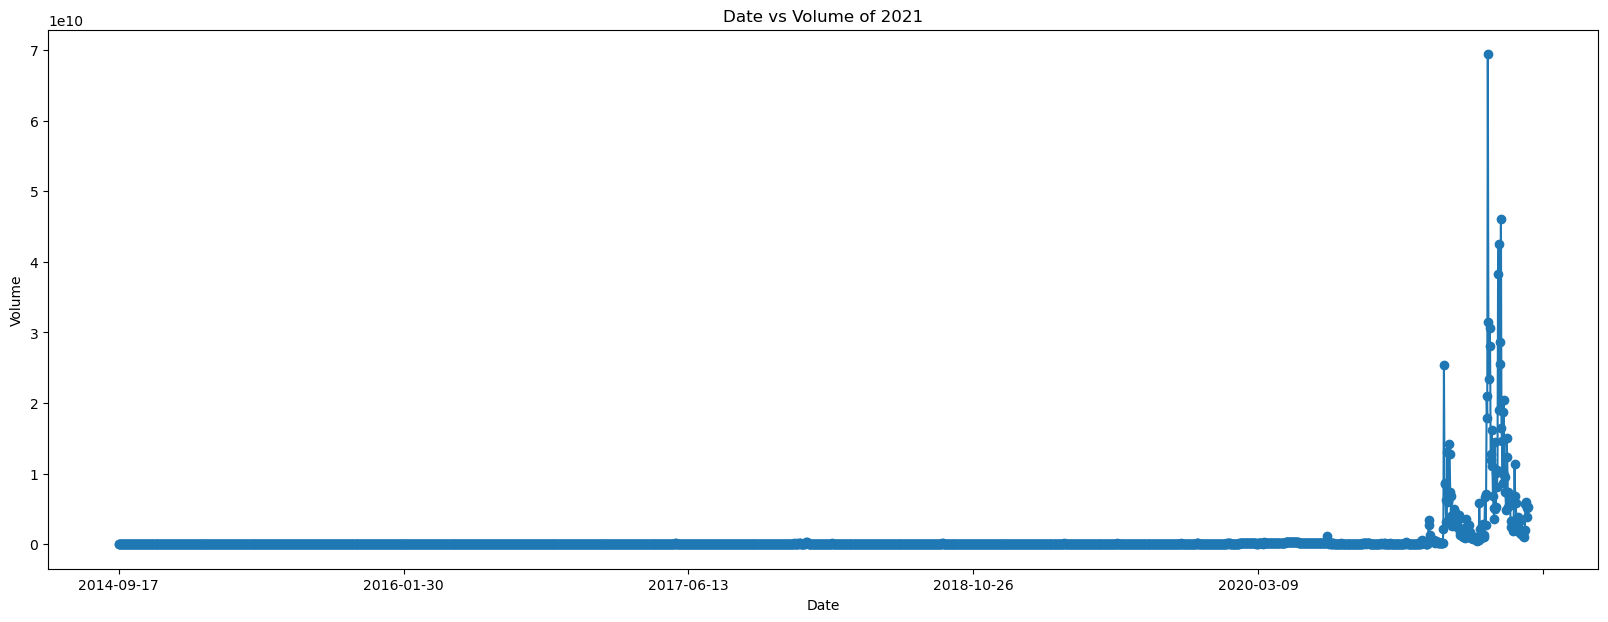

In [6]:
plt.figure(figsize=(20,7))
df.groupby('Date')['Volume'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume of 2021")

**C. Opening price for Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs Open of 2021')

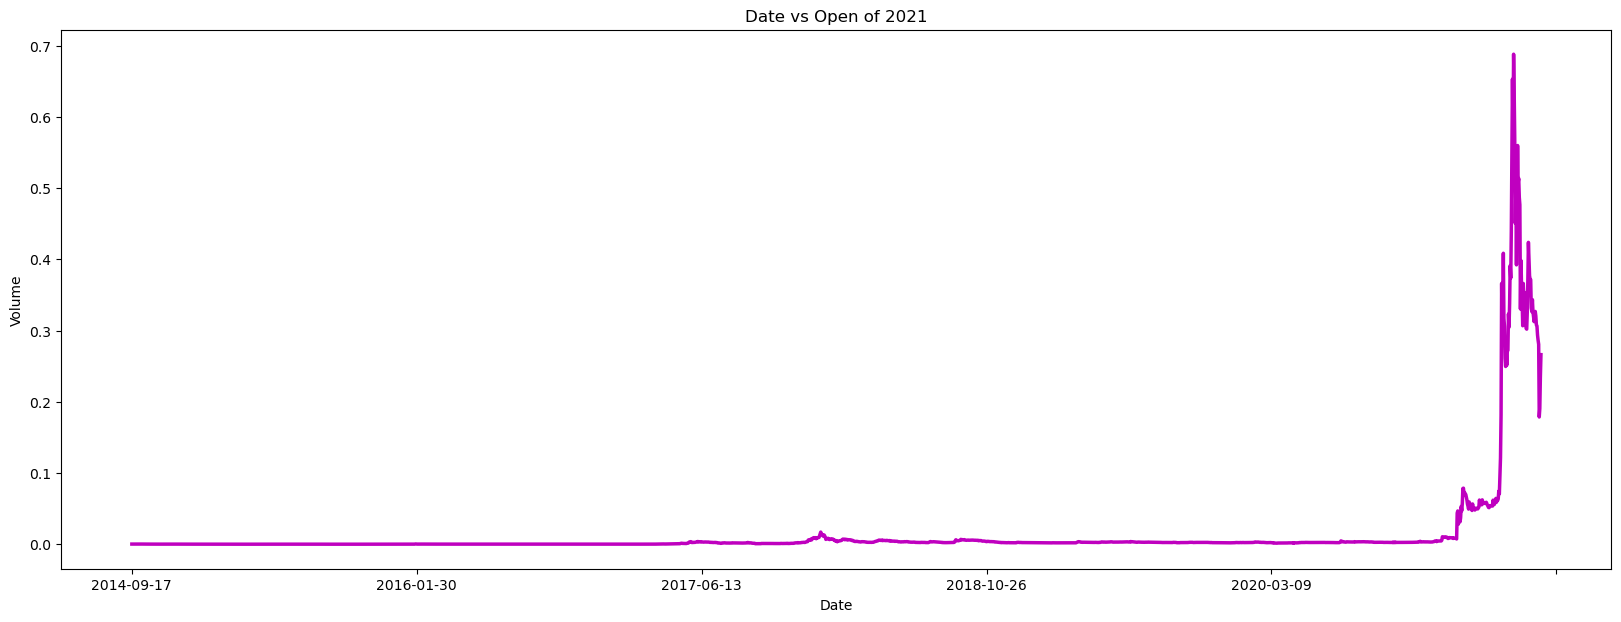

In [7]:
plt.figure(figsize=(20,7))
df.groupby('Date')['Open'].mean().plot(linewidth = 2.5, color = 'm')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Open of 2021")

**D. Maximum price achieved by Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs High of 2021')

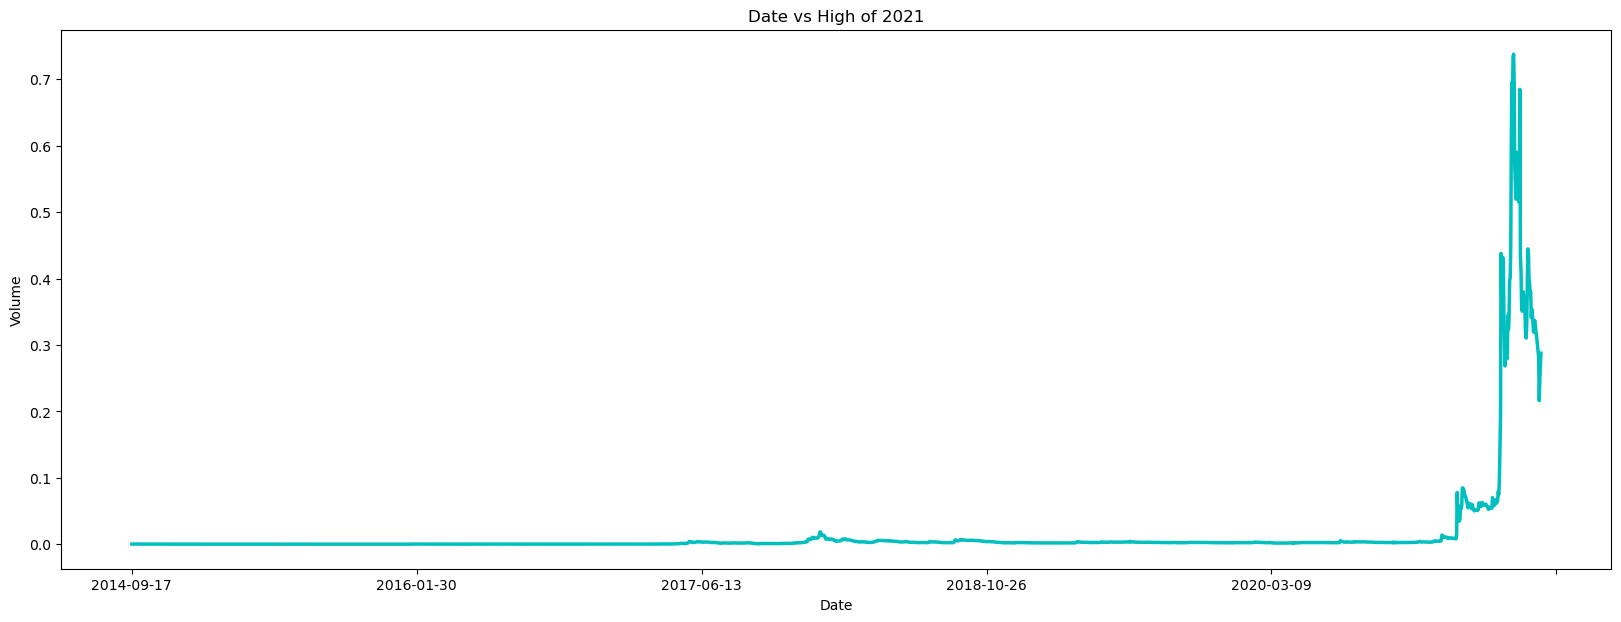

In [8]:
plt.figure(figsize=(20,7))
df.groupby('Date')['High'].mean().plot(linewidth = 2.5, color = 'c')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs High of 2021")

**E. Lowest price achieved by Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs Low of 2021')

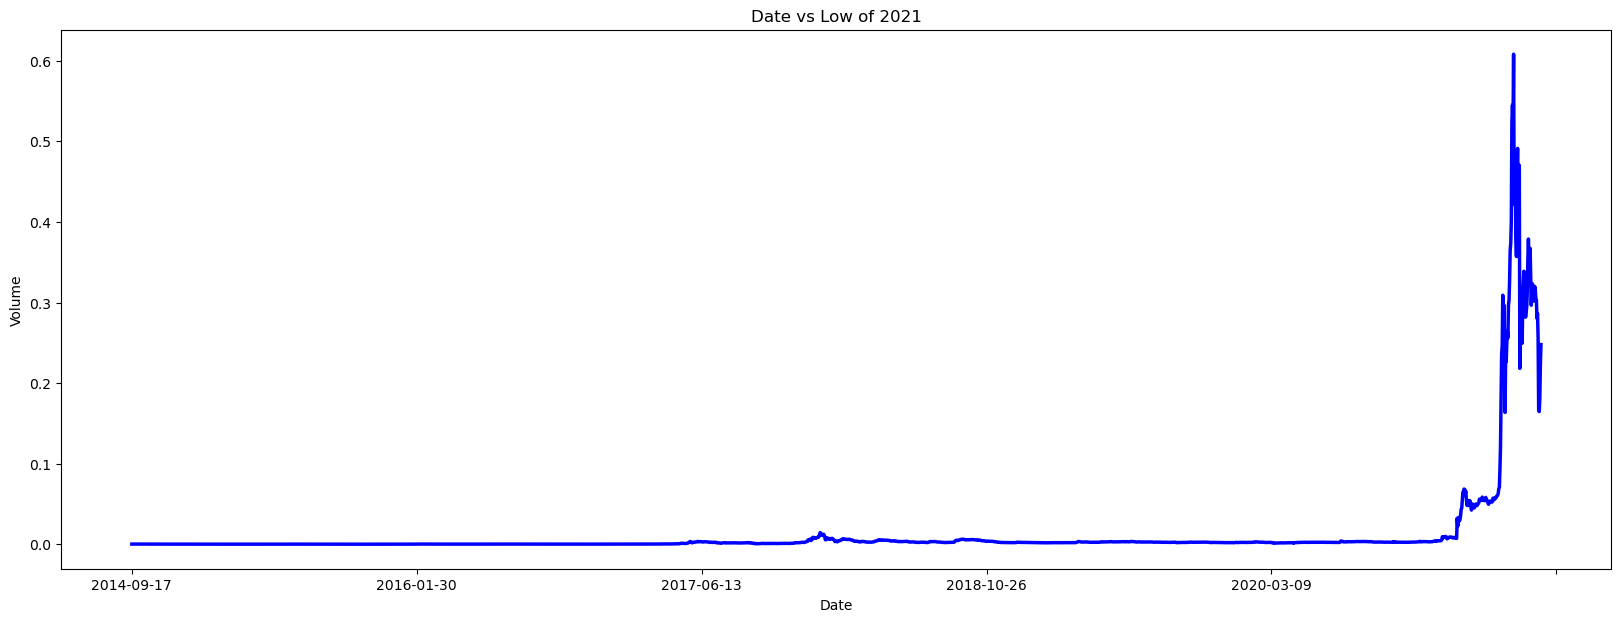

In [9]:
plt.figure(figsize=(20,7))
df.groupby('Date')['Low'].mean().plot(linewidth = 2.5, color = 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Low of 2021")

**F. Closing price achieved by Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs Close of 2021')

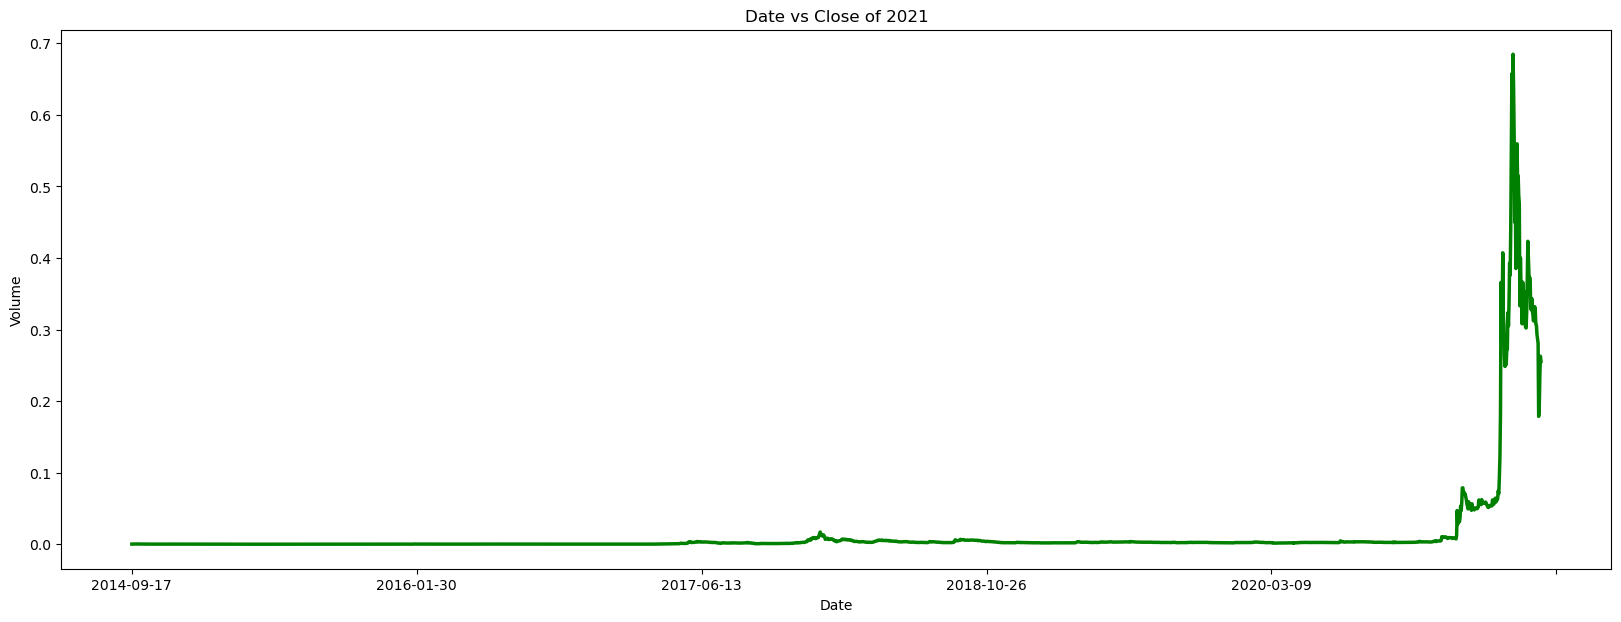

In [10]:
plt.figure(figsize=(20,7))
df.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

**G. Adjustment price of Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs Adj Close of 2021')

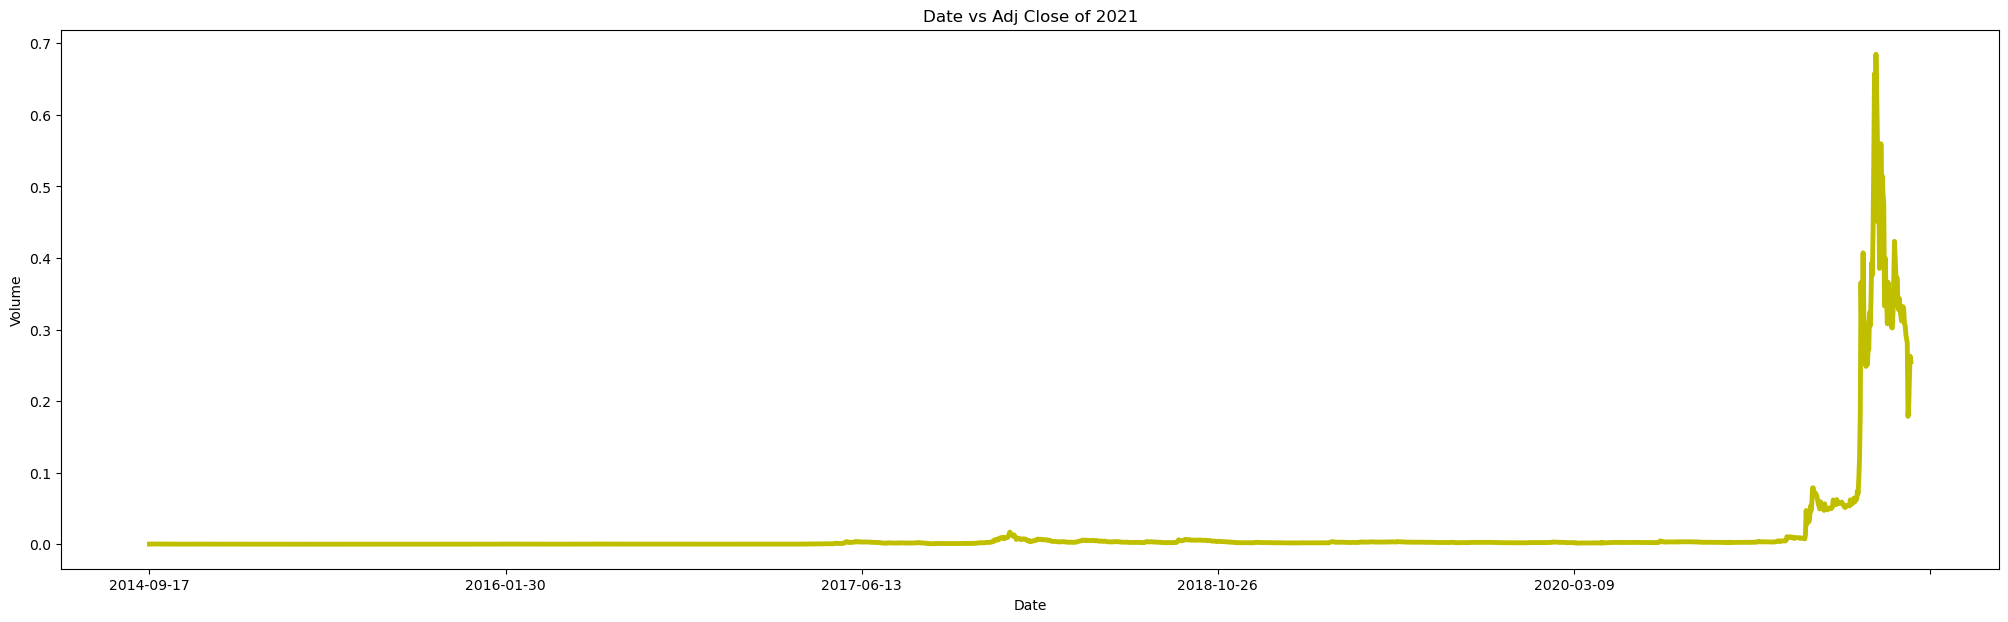

In [11]:
plt.figure(figsize=(25,7))
df.groupby('Date')['Adj Close'].mean().plot(linewidth = 3.5, color = 'y')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Adj Close of 2021")

#### G. Lets Check the correlation between features of the dataset. How much they close to eachother.

In [12]:
new_df = pd.read_csv('./DataSets/DOGE-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2474 non-null   float64
 1   High    2474 non-null   float64
 2   Low     2474 non-null   float64
 3   Close   2474 non-null   float64
 4   Volume  2474 non-null   float64
dtypes: float64(5)
memory usage: 96.8 KB


<AxesSubplot:>

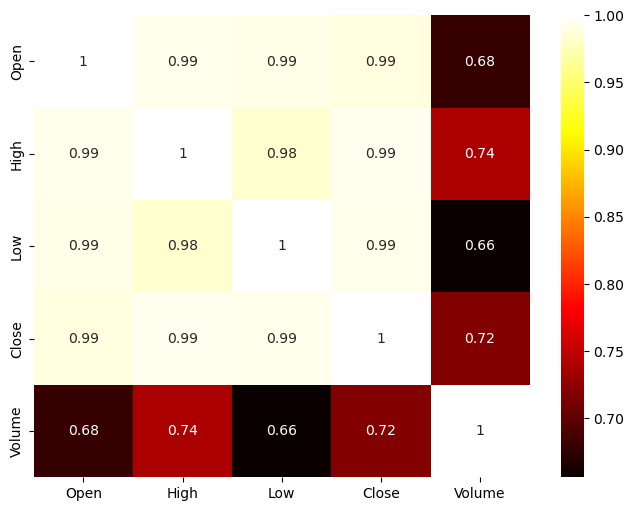

In [13]:
plt.figure(figsize = (8,6))
sns.heatmap(new_df.corr() , cmap = 'hot', annot = True)

From the above figure we can see that all the features are closely related to each other.

**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 70:30 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [14]:
X = new_df.drop('High', axis=1)
y = new_df['High']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2474, 4)
Shape of y =  (2474,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1731, 4)
Shape of y_train =  (1731,)
Shape of X_test =  (743, 4)
Shape of y_test =  (743,)


### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [16]:
from sklearn import metrics

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [19]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0010491998923283998
Residual Sum of Squares(MSE): 0.00010507313771179019
R2-Score: 0.9809863510565062


In [20]:
ds = pd.DataFrame()
ds['High']=y_test

In [21]:
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000217
2037,0.001975,0.001996
952,0.000552,0.000558
1615,0.002124,0.002117
1712,0.003115,0.003147
1234,0.005023,0.005015
1605,0.001957,0.001956
56,0.000248,0.000249
2194,0.002814,0.002840
926,0.000360,0.000340


<AxesSubplot:>

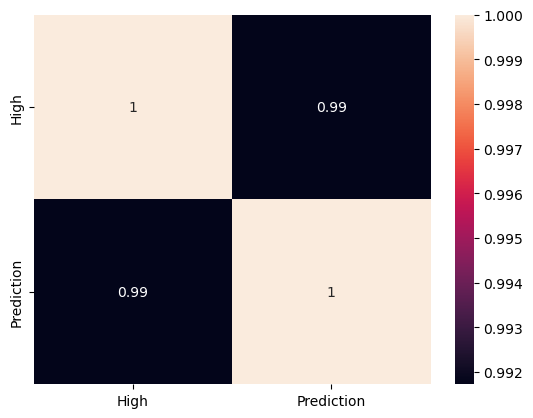

In [22]:
sns.heatmap(ds.corr(), annot = True)

### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [25]:
y_pred = regr.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.000814112660770038
Residual Sum of Squares(MSE): 6.683724044820407e-05
R2-Score: 0.987905378540043


In [26]:
y_pred = regressor.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)


,High,Prediction
873,0.000216,0.000217
2037,0.001975,0.001996
952,0.000552,0.000558
1615,0.002124,0.002117
1712,0.003115,0.003147
1234,0.005023,0.005015
1605,0.001957,0.001956
56,0.000248,0.000249
2194,0.002814,0.002840
926,0.000360,0.000340


<AxesSubplot:>

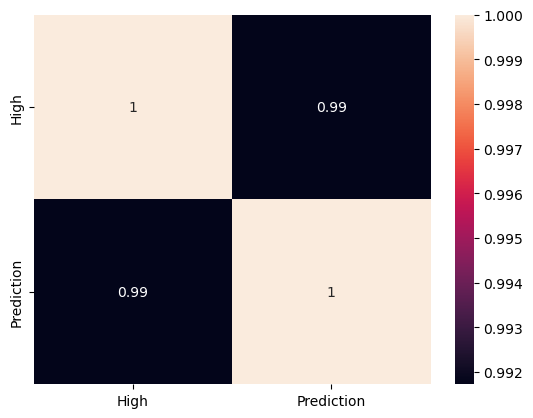

In [27]:
sns.heatmap(ds.corr(), annot = True)

### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred = dtr.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.001293589502018842
Residual Sum of Squares(MSE): 0.00016005164288694477
R2-Score: 0.9710376427605213


In [30]:
y_pred = regressor.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000217
2037,0.001975,0.001996
952,0.000552,0.000558
1615,0.002124,0.002117
1712,0.003115,0.003147
1234,0.005023,0.005015
1605,0.001957,0.001956
56,0.000248,0.000249
2194,0.002814,0.002840
926,0.000360,0.000340


<AxesSubplot:>

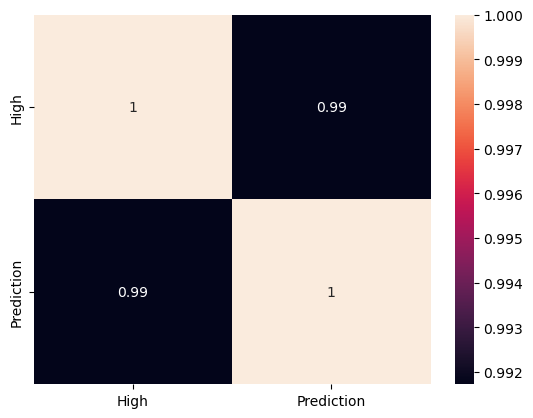

In [31]:
sns.heatmap(ds.corr(), annot = True)

### Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [32]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [33]:
y_pred = lasso.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.014953047193295151
Residual Sum of Squares(MSE): 0.002368090539060236
R2-Score: 0.5714790368247654


In [34]:
y_pred = lasso.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.006940
2037,0.001975,0.009917
952,0.000552,0.006962
1615,0.002124,0.007402
1712,0.003115,0.008146
1234,0.005023,0.007463
1605,0.001957,0.007253
56,0.000248,0.006948
2194,0.002814,0.009516
926,0.000360,0.006983


<AxesSubplot:>

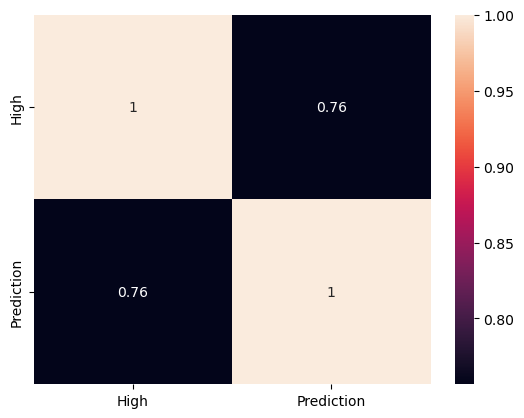

In [35]:
sns.heatmap(ds.corr(), annot = True)

### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [36]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.53706e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=0.1)

In [37]:
y_pred = ridge.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0011448053158522257
Residual Sum of Squares(MSE): 0.00011593185349480459
R2-Score: 0.9790213977452067


In [38]:
y_pred = ridge.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000062
2037,0.001975,0.002300
952,0.000552,0.000403
1615,0.002124,0.002030
1712,0.003115,0.003153
1234,0.005023,0.004443
1605,0.001957,0.001848
56,0.000248,0.000083
2194,0.002814,0.003125
926,0.000360,0.000172


<AxesSubplot:>

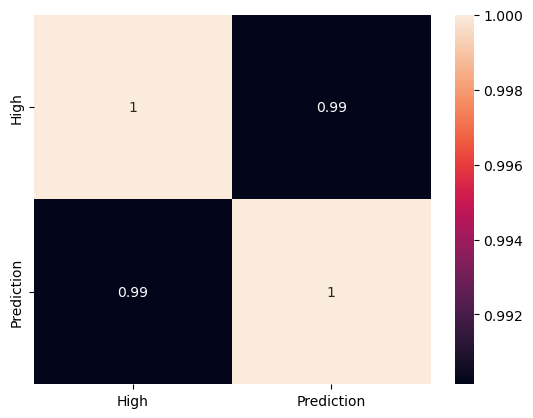

In [39]:
sns.heatmap(ds.corr(), annot = True)

### XgBoost Regressor 
XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [40]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
y_pred = xgb.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0009993967330513716
Residual Sum of Squares(MSE): 6.399077069050305e-05
R2-Score: 0.9884204652489756


In [42]:
y_pred = xgb.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000220
2037,0.001975,0.002163
952,0.000552,0.000597
1615,0.002124,0.002163
1712,0.003115,0.002943
1234,0.005023,0.004768
1605,0.001957,0.002163
56,0.000248,0.000252
2194,0.002814,0.002843
926,0.000360,0.000327


<AxesSubplot:>

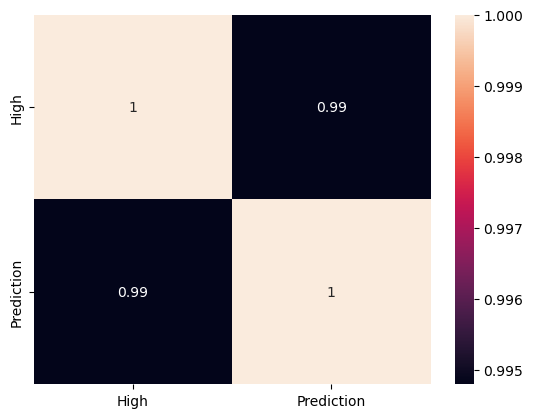

In [43]:
sns.heatmap(ds.corr(), annot = True)

### MLP Regressor 
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [44]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor()

In [45]:
y_pred = mlp.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 859.0608804980294
Residual Sum of Squares(MSE): 25287726.699042432
R2-Score: -4575974110.989018


In [46]:
y_pred = mlp.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.278737
2037,0.001975,273.591997
952,0.000552,2.303886
1615,0.002124,42.715679
1712,0.003115,111.042729
1234,0.005023,48.278389
1605,0.001957,29.032633
56,0.000248,1.055808
2194,0.002814,236.803427
926,0.000360,4.197566


<AxesSubplot:>

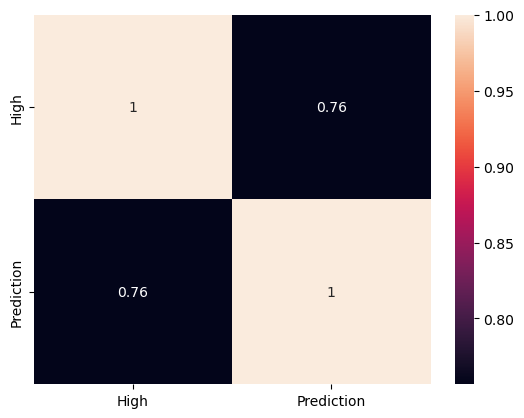

In [47]:
sns.heatmap(ds.corr(), annot = True)

### Gradient Boosting Regressor 
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [49]:
y_pred = gb.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0010752495640675706
Residual Sum of Squares(MSE): 8.856879620898628e-05
R2-Score: 0.9839729160550561


In [50]:
y_pred = gb.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000236
2037,0.001975,0.002106
952,0.000552,0.000546
1615,0.002124,0.002139
1712,0.003115,0.003155
1234,0.005023,0.004835
1605,0.001957,0.001798
56,0.000248,0.000254
2194,0.002814,0.002909
926,0.000360,0.000353


<AxesSubplot:>

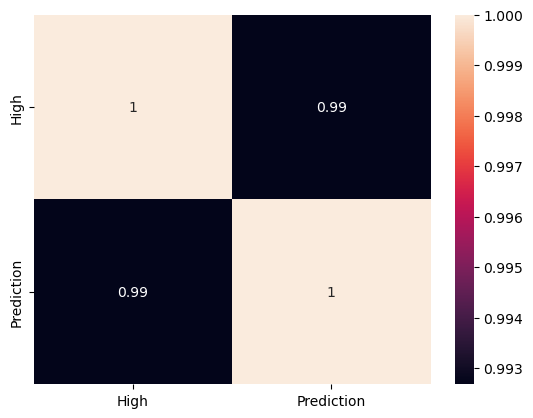

In [51]:
sns.heatmap(ds.corr(), annot = True)

### Support Vector Machine Regressor 
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

In [52]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [53]:
y_pred = svm.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0693862524683058
Residual Sum of Squares(MSE): 0.006015430851335689
R2-Score: -0.08853026512717377


In [54]:
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.063551
2037,0.001975,0.074266
952,0.000552,0.063625
1615,0.002124,0.065133
1712,0.003115,0.067749
1234,0.005023,0.065343
1605,0.001957,0.064619
56,0.000248,0.063579
2194,0.002814,0.072758
926,0.000360,0.063695


<AxesSubplot:>

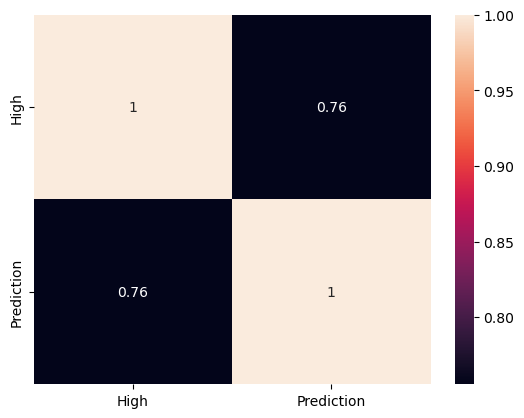

In [55]:
sns.heatmap(ds.corr(), annot = True)

------------------------
### Model Comparision

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|98.79%|
|Decision Tree Regressor|97.50%|
|Random Forest Regressor|98.04%|
|Lasso Regression|57.15%|
|Ridge Regression|97.90%|
|XgBoost Regressor|98.65%|
|MLP Regressor|-104%|
|Gradient Boosting Regressor|98.14%|
|Support Vector Regressor|-8.85%|

